# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

#### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

#### Data Generation

In [2]:
# Data generation

#data of Gaussian Distributions
#distribution 1
mu1 = [2, 2]
sigma1 = [[5, 0], [0, 5]] # Notice the 0 covariance
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

#distribution 2
mu2 = [-2, -2]
sigma2 = [[3, 0], [0, 3]] # Notice the 0 covariance
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

#### Excercise: A) Plot the decision boundary

In [3]:
def predict_class(X,mu_list,sigma_list):  
    return np.argmax([scipy.stats.multivariate_normal.pdf(X,mu_list[i],sigma_list[i]) for i,_ in enumerate(mu_list)])

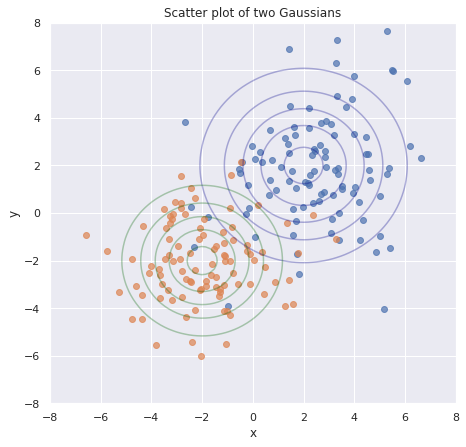

In [4]:
#%%%%%%%%%%%%%% Excercise: Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the decision boundary for the optimal and the naive Bayes classifiers goes here
"""

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

X = np.linspace(-8, 8, 100)
Y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(X, Y, copy = True,indexing='xy')

fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

# Plotting the contours of the Gaussians
for i in range(2):
    zz = np.array([scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y))])

    # Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

    # Plot
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])


ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

plt.show()

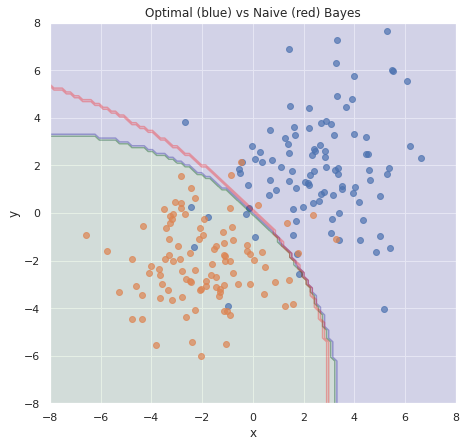

In [5]:
# Optimal Bayes classifier
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 2)

# Plotting the contours of the Gaussians
zz = np.array(  [ predict_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

# Reshaping to the meshgrid shape
Z = zz.reshape(X.shape)

# Plot
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))


# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Setup data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

# Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

# Predictions for each point on meshgrid
zz = np.array([model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y))])

# Reshaping to the meshgrid shape
Z = zz.reshape(X.shape)

# Plot
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))
ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')



plt.show()

#### Excercise: B) Accuracies

In [6]:
#%%%%%%%%%%%%%% EXCERCISE - Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the accuracies of the optimal and the naive Bayes classifiers goes here
"""
# Optimal Bayes accuracy
y_pred = np.array(  [predict_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X_data[:,0]), np.ravel(X_data[:,1])) ] )
print("Optimal Bayes : ",np.mean(y_pred == y_labels))

# Naive Bayes accuracy
print("Naive Bayes : ",model_sk.score(X_data,y_labels))

Optimal Bayes :  0.93
Naive Bayes :  0.925
